In [2]:
import sys, os
import pandas as pd
import numpy as np
import ast
from bs4 import BeautifulSoup
from collections import Counter
import wikifunctions as wf
import datetime
import matplotlib as plt
import seaborn as sb
import re
from pathlib import Path

In [3]:
#rules = pd.read_csv("202104_rules_withillcolumns",sep='\t',header=0)
#rules.loc[rules.num_links==5].drop_duplicates(subset=['rc'],keep='first').to_csv('rule_concepts_all_ills.tsv',sep='\t',index=False, header=True)
rules = pd.read_csv("rule_concepts_all_ills.tsv",sep='\t',header=0)

In [4]:
#C:\sohw\wikipi\1.0_dataverse\output_rulepagerevs\2022-06-06

rev_path = Path(os.getcwd()).parent.parent / "1.0_dataverse" / "output_rulepagerevs" / "2022-06-06" #/ "2020-07-31"

# page revision histories
rev_df_de = pd.read_csv( rev_path / "de_revisions.tsv",sep='\t',header=0,encoding='utf8',parse_dates=['date','timestamp'])
rev_df_en = pd.read_csv( rev_path / "en_revisions.tsv",sep='\t',header=0,encoding='utf8',parse_dates=['date','timestamp'])
rev_df_es = pd.read_csv( rev_path / "es_revisions.tsv",sep='\t',header=0,encoding='utf8',parse_dates=['date','timestamp'])
rev_df_fr = pd.read_csv( rev_path / "fr_revisions.tsv",sep='\t',header=0,encoding='utf8',parse_dates=['date','timestamp'])
rev_df_ja = pd.read_csv( rev_path / "ja_revisions.tsv",sep='\t',header=0,encoding='utf8',parse_dates=['date','timestamp'])

# talk page revision histories
talkrev_df_de = pd.read_csv( rev_path / "de_revisions_talk.tsv",sep='\t',header=0,encoding='utf8',parse_dates=['date','timestamp'],low_memory=False)
talkrev_df_en = pd.read_csv( rev_path / "en_revisions_talk.tsv",sep='\t',header=0,encoding='utf8',parse_dates=['date','timestamp'],low_memory=False)
talkrev_df_es = pd.read_csv( rev_path / "es_revisions_talk.tsv",sep='\t',header=0,encoding='utf8',parse_dates=['date','timestamp'],low_memory=False)
talkrev_df_fr = pd.read_csv( rev_path / "fr_revisions_talk.tsv",sep='\t',header=0,encoding='utf8',parse_dates=['date','timestamp'],low_memory=False)
talkrev_df_ja = pd.read_csv( rev_path / "ja_revisions_talk.tsv",sep='\t',header=0,encoding='utf8',parse_dates=['date','timestamp'],low_memory=False)

C:\Users\sohye\AppData\Local\Temp\ipykernel_10772\4278710304.py:7: DtypeWarning: Columns (0,3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  rev_df_en = pd.read_csv( rev_path / "en_revisions.tsv",sep='\t',header=0,encoding='utf8',parse_dates=['date','timestamp'])
C:\Users\sohye\AppData\Local\Temp\ipykernel_10772\4278710304.py:9: DtypeWarning: Columns (14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  rev_df_fr = pd.read_csv( rev_path / "fr_revisions.tsv",sep='\t',header=0,encoding='utf8',parse_dates=['date','timestamp'])


In [5]:
# get rid of duplicate revisions for each language edition
rev_df_de.drop_duplicates(subset=['revid'],inplace=True)
rev_df_en.drop_duplicates(subset=['revid'],inplace=True)
rev_df_es.drop_duplicates(subset=['revid'],inplace=True)
rev_df_fr.drop_duplicates(subset=['revid'],inplace=True)
rev_df_ja.drop_duplicates(subset=['revid'],inplace=True)

talkrev_df_de.drop_duplicates(subset=['revid'],inplace=True)
talkrev_df_en.drop_duplicates(subset=['revid'],inplace=True)
talkrev_df_es.drop_duplicates(subset=['revid'],inplace=True)
talkrev_df_fr.drop_duplicates(subset=['revid'],inplace=True)
talkrev_df_ja.drop_duplicates(subset=['revid'],inplace=True)

# get rid of incomplete data
rev_df_de.dropna(subset=['revid','date','diff','lag'],inplace=True)
rev_df_en.dropna(subset=['revid','date','diff','lag'],inplace=True)
rev_df_es.dropna(subset=['revid','date','diff','lag'],inplace=True)
rev_df_fr.dropna(subset=['revid','date','diff','lag'],inplace=True)
rev_df_ja.dropna(subset=['revid','date','diff','lag'],inplace=True)

talkrev_df_de.dropna(subset=['revid','date','diff','lag'],inplace=True)
talkrev_df_en.dropna(subset=['revid','date','diff','lag'],inplace=True)
talkrev_df_es.dropna(subset=['revid','date','diff','lag'],inplace=True)
talkrev_df_fr.dropna(subset=['revid','date','diff','lag'],inplace=True)
talkrev_df_ja.dropna(subset=['revid','date','diff','lag'],inplace=True)

In [6]:
# make a column for the year of the revision
rev_df_de['year'] = rev_df_de['timestamp'].dt.strftime('%Y')
rev_df_de['year'] = rev_df_de['year'].astype(np.int64)
talkrev_df_de['year'] = talkrev_df_de['timestamp'].dt.strftime('%Y')
talkrev_df_de['year'] = talkrev_df_de['year'].astype(np.int64)

rev_df_en['year'] = rev_df_en['date'].dt.strftime('%Y')
rev_df_en['year'] = rev_df_en['year'].astype(np.int64)
talkrev_df_en['year'] = talkrev_df_en['timestamp'].dt.strftime('%Y')
talkrev_df_en['year'] = talkrev_df_en['year'].astype(np.int64)

rev_df_es['year'] = rev_df_es['timestamp'].dt.strftime('%Y')
rev_df_es['year'] = rev_df_es['year'].astype(np.int64)
talkrev_df_es['year'] = talkrev_df_es['timestamp'].dt.strftime('%Y')
talkrev_df_es['year'] = talkrev_df_es['year'].astype(np.int64)

rev_df_fr['year'] = rev_df_fr['timestamp'].dt.strftime('%Y')
rev_df_fr['year'] = rev_df_fr['year'].astype(np.int64)
talkrev_df_fr['year'] = talkrev_df_fr['timestamp'].dt.strftime('%Y')
talkrev_df_fr['year'] = talkrev_df_fr['year'].astype(np.int64)

rev_df_ja['year'] = rev_df_ja['timestamp'].dt.strftime('%Y')
rev_df_ja['year'] = rev_df_ja['year'].astype(np.int64)
talkrev_df_ja['year'] = talkrev_df_ja['timestamp'].dt.strftime('%Y')
talkrev_df_ja['year'] = talkrev_df_ja['year'].astype(np.int64)

In [7]:
rev_df_list = [rev_df_en,rev_df_fr,rev_df_de,rev_df_ja,rev_df_es]
talkrev_df_list = [talkrev_df_en,talkrev_df_fr,talkrev_df_de,talkrev_df_ja,talkrev_df_es]

wikilinks
linkcount.toolforge.org

3/30/2023
direct links to those rule pages
```
             en       de       es        fr       ja
NPOV  1,664,538   66,408   60,689   152,508   74,803
   V  3,634,746  250,003  100,905   238,610  254,320
 NOR  1,271,333    8,089   13,491    75,367   61,404
```

`2002	5	Wikipedia:Neutraler Standpunkt	Wikipedia:Neutral point of view	Wikipedia:Punto de vista neutral	Wikipédia:Neutralité de point de vue	Wikipedia:中立的な観点	131.0`

`2005	5	Wikipedia:Belege	Wikipedia:Verifiability	Wikipedia:Verificabilidad	Wikipédia:Vérifiabilité	Wikipedia:検証可能性	41.0`

`2006	5	Wikipedia:Keine Theoriefindung	Wikipedia:No original research	Wikipedia:Wikipedia no es una fuente primaria	Wikipédia:Travaux inédits	Wikipedia:独自研究は載せない	85.0`

In [8]:
#`2002	5	Wikipedia:Neutraler Standpunkt	Wikipedia:Neutral point of view	Wikipedia:Punto de vista neutral	Wikipédia:Neutralité de point de vue	Wikipedia:中立的な観点	131.0`

npov_en = rev_df_en.loc[rev_df_en.page=="Wikipedia:Neutral point of view"]
npov_en_talk = talkrev_df_en.loc[talkrev_df_en.page=="Wikipedia talk:Neutral point of view"]

npov_fr = rev_df_fr.loc[rev_df_fr.page=="Wikipédia:Neutralité de point de vue"]
npov_fr_talk = talkrev_df_fr.loc[talkrev_df_fr.page=="Discussion Wikipédia:Neutralité de point de vue"]

npov_de = rev_df_de.loc[rev_df_de.page=="Wikipedia:Neutraler Standpunkt"]
npov_de_talk = talkrev_df_de.loc[talkrev_df_de.page=="Wikipedia Diskussion:Neutraler Standpunkt"]

npov_es = rev_df_es.loc[rev_df_es.page=="Wikipedia:Punto de vista neutral"]
npov_es_talk = talkrev_df_es.loc[talkrev_df_es.page=="Wikipedia discusión:Punto de vista neutral"]

npov_ja = rev_df_ja.loc[rev_df_ja.page=="Wikipedia:中立的な観点"]
npov_ja_talk = talkrev_df_ja.loc[talkrev_df_ja.page=="Wikipedia‐ノート:中立的な観点"]


In [8]:
wf.get_page_externallinks("Wikipédia:Neutralité de point de vue",endpoint='fr.wikipedia.org/w/api.php')
wf.get_page_externallinks("Wikipedia:Punto de vista neutral",endpoint='es.wikipedia.org/w/api.php')
wf.get_page_externallinks("Wikipedia:Neutraler Standpunkt",endpoint='de.wikipedia.org/w/api.php')
wf.get_page_externallinks("Wikipedia:中立的な観点",endpoint='ja.wikipedia.org/w/api.php')
wf.get_page_externallinks("Wikipedia:Neutral point of view")


['http://www.bbc.co.uk/bbctrust/news/press_releases/2011/science_impartiality.html',
 'https://web.archive.org/web/20121221081200/http://www.bbc.co.uk/bbctrust/news/press_releases/2011/science_impartiality.html',
 'http://downloads.bbc.co.uk/bbctrust/assets/files/pdf/our_work/science_impartiality/trust_conclusions.pdf',
 'https://web.archive.org/web/20140707232459/http://downloads.bbc.co.uk/bbctrust/assets/files/pdf/our_work/science_impartiality/trust_conclusions.pdf',
 'https://lists.wikimedia.org/pipermail/wikien-l/2003-September/006715.html',
 'https://web.archive.org/web/20001205000200/http://www.nupedia.com/policy.shtml#III',
 'https://web.archive.org/web/20010416035716/www.wikipedia.com/wiki/RulesToConsider',
 'http://cyber.law.harvard.edu/~reagle/wp-redux/NeutralPointOfView/982358834.html',
 'https://web.archive.org/web/20010416035757/http://www.wikipedia.com/wiki/NeutralPointOfView',
 'https://web.archive.org/web/20110406110157/http://lists.wikimedia.org/pipermail/wikien-l/2003

In [9]:
npov = [npov_en,npov_fr,npov_de,npov_ja,npov_es]
npov_talk = [npov_en_talk,npov_fr_talk,npov_de_talk,npov_ja_talk,npov_es_talk]

In [10]:
for _df in npov:
    _df_noAnon = _df.loc[_df.anon!=True]
    _df_Anon = _df.loc[_df.anon==True]
    print('all revs', len(_df), 'anon', len(_df_Anon),'non-anon', len(_df_noAnon), 'percent anon', 1-len(_df_noAnon)/len(_df))
    print(len(set(_df.user.values.tolist())), 'anon', len(set(_df_Anon.user.values.tolist())), 'percent anon', len(set(_df_Anon.user.values.tolist()))/len(set(_df.user.values.tolist())))
    print('not anon',len(set(_df_noAnon.user.values.tolist())))

all revs 5497 anon 836 non-anon 4661 percent anon 0.1520829543387302
2126 anon 624 percent anon 0.29350893697083724
not anon 1502
all revs 633 anon 96 non-anon 537 percent anon 0.15165876777251186
289 anon 82 percent anon 0.2837370242214533
not anon 207
all revs 1039 anon 120 non-anon 919 percent anon 0.1154956689124158
406 anon 93 percent anon 0.229064039408867
not anon 313
all revs 246 anon 46 non-anon 200 percent anon 0.1869918699186992
126 anon 35 percent anon 0.2777777777777778
not anon 91
all revs 352 anon 83 non-anon 269 percent anon 0.23579545454545459
196 anon 70 percent anon 0.35714285714285715
not anon 126


In [11]:
for _df in npov_talk:
    _df_noAnon = _df.loc[_df.anon!=True]
    _df_Anon = _df.loc[_df.anon==True]
    print('all revs', len(_df), 'anon', len(_df_Anon),'non-anon', len(_df_noAnon), 'percent anon', 1-len(_df_noAnon)/len(_df))
    print(len(set(_df.user.values.tolist())), 'anon', len(set(_df_Anon.user.values.tolist())), 'percent anon', len(set(_df_Anon.user.values.tolist()))/len(set(_df.user.values.tolist())))
    print('not anon',len(set(_df_noAnon.user.values.tolist())))

all revs 15503 anon 435 non-anon 15068 percent anon 0.028059085338321577
1411 anon 218 percent anon 0.15450035435861093
not anon 1193
all revs 713 anon 23 non-anon 690 percent anon 0.032258064516129004
114 anon 14 percent anon 0.12280701754385964
not anon 100
all revs 3280 anon 189 non-anon 3091 percent anon 0.05762195121951219
363 anon 109 percent anon 0.3002754820936639
not anon 254
all revs 575 anon 19 non-anon 556 percent anon 0.03304347826086962
93 anon 9 percent anon 0.0967741935483871
not anon 84
all revs 202 anon 43 non-anon 159 percent anon 0.21287128712871284
121 anon 34 percent anon 0.2809917355371901
not anon 87


In [12]:
for _df in npov:
    print(len(set(_df.user.values.tolist())))
    print(len(_df) / len(set(_df.user.values.tolist())))
print("")
for _df in npov_talk:
    print(len(set(_df.user.values.tolist())))
    print(len(_df) / len(set(_df.user.values.tolist())))

2126
2.585606773283161
289
2.190311418685121
406
2.5591133004926108
126
1.9523809523809523
196
1.7959183673469388

1411
10.987243090007087
114
6.254385964912281
363
9.03581267217631
93
6.182795698924731
121
1.6694214876033058


In [13]:
len(set(npov_es.user.values.tolist()).intersection(set(npov_es_talk.user.values.tolist())))

26

In [14]:
set(npov_en.user.values.tolist()).intersection(set(npov_fr.user.values.tolist()))

{'212.24.201.79',
 '88.17.28.245',
 'Addbot',
 'Almabot',
 'BOTarate',
 'BodhisattvaBot',
 'Brion VIBBER',
 'EmausBot',
 'JAnDbot',
 'Michelet',
 'Obersachsebot',
 'OffsBlink',
 'Rama',
 'Rezabot',
 'SashatoBot',
 'Synthebot',
 'VolkovBot',
 'Xqbot',
 'YurikBot'}

In [15]:
set(npov_en.user.values.tolist()).intersection(set(npov_fr.user.values.tolist())).intersection(set(npov_es.user.values.tolist())).intersection(set(npov_de.user.values.tolist())).intersection(set(npov_ja.user.values.tolist()))

{'Addbot', 'Almabot', 'EmausBot', 'JAnDbot', 'VolkovBot', 'Xqbot'}

In [16]:
npov_ja.loc[npov_ja.user=='142.166.250.244']

,revid,parentid,user,userid,timestamp,size,sha1,comment,anon,page,date,diff,lag,age,sha1hidden,commenthidden,userhidden,suppressed,year
4874,50078,37573,142.166.250.244,0,2003-07-29 19:12:08+00:00,64568,edbe77338c0c0f8f32bed59f391c3164b03161e3,NaN,True,Wikipedia:中立的な観点,2003-07-29,151.0,3302236.0,177.525336,NaN,NaN,NaN,NaN,2003


In [17]:
overlapping_ip_addresses = ['88.17.28.245', '142.166.250.244', '80.185.166.55', '195.98.8.3', '212.24.201.79']

In [18]:
npov_en.groupby(by=['user']).size().sort_values(ascending=False).reset_index().reset_index()

,index,user,0
0,0,Francis Schonken,121
1,1,SlimVirgin,112
2,2,QuackGuru,99
3,3,Kotniski,86
4,4,Crum375,85
...,...,...,...
2120,2120,Ben Standeven,1
2121,2121,Bemoeial,1
2122,2122,Beland,1
2123,2123,Behaafarid,1


In [19]:
sb.color_palette(palette='colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [21]:
for _df in npov:
    print(
        _df.groupby(by=['user']).size().sort_values(ascending=False).reset_index().reset_index().rename(columns={"index":"x",0:"y"}).y.skew()
    )

10.135084716211894
6.092775216519009
7.847779976266905
4.498674053370019
3.9984650979058505


In [22]:
for _df in npov_talk:
    print(
        _df.groupby(by=['user']).size().sort_values(ascending=False).reset_index().reset_index().rename(columns={"index":"x",0:"y"}).y.skew()
    )

7.244707947756974
2.6796212074741512
13.485867598445305
3.2403139116306106
3.677751469125286


In [23]:
npov_es.groupby(by=['user']).size().sort_values(ascending=False).reset_index().reset_index()

,index,user,0
0,0,VolkovBot,17
1,1,MerlIwBot,11
2,2,Ferbr1,9
3,3,AVBOT,8
4,4,Libertad y Saber,8
...,...,...,...
191,191,Ambil,1
192,192,Anthere,1
193,193,Antonio-lanceta,1
194,194,Antony eduardo,1


<AxesSubplot:xlabel='Spanish', ylabel='# contributions'>

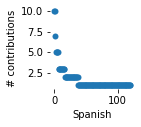

In [47]:
f, ax = plt.pyplot.subplots(figsize=(1.5,1.5))
sb.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sb.scatterplot(x="Spanish", y="# contributions",
                #hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=npov_es_talk.groupby(by=['user']).size().sort_values(ascending=False).reset_index().reset_index().rename(columns={"index":"Spanish",0:"# contributions"}), 
                ax=ax)

In [56]:
len(set(wf.get_page_outlinks("Wikipedia:Neutral Point of View")))

46

In [59]:
set(wf.get_page_outlinks("Wikipédia:Neutralité de point de vue",endpoint='fr.wikipedia.org/w/api.php'))

{"Argument d'autorité",
 'Charles Darwin',
 'Créationnisme',
 'Discussion Wikipédia:Neutralité de point de vue',
 "Jack l'Éventreur",
 'Jimmy Wales',
 'Jugement (philosophie)',
 'Larry Sanger',
 'Massacre de Boston',
 'Massacre de Haymarket Square',
 'Point de vue cognitif',
 'Relativisme',
 'Scandale de Panama',
 'Sélection naturelle',
 'The Atlantic Monthly',
 'Wikipédia',
 'Wikipédia:Autobiographie',
 "Wikipédia:Conflit d'intérêts",
 'Wikipédia:Contenu évasif',
 'Wikipédia:Controverse de neutralité',
 'Wikipédia:Convention sur les titres',
 'Wikipédia:Importance disproportionnée',
 'Wikipédia:Liste des articles non neutres/FAQ',
 'Wikipédia:Notoriété',
 'Wikipédia:P',
 'Wikipédia:POV-fork',
 'Wikipédia:Principes fondateurs',
 'Wikipédia:Proportion',
 'Wikipédia:Règles et recommandations',
 'Wikipédia:SQ',
 'Wikipédia:Théorie controversée',
 'Wikipédia:UNDUE',
 'Wikipédia:Vérifiabilité',
 'Wikipédia:Wikipédia est une encyclopédie',
 'YouTube',
 'meta:La neutralité de point de vue',
 

In [17]:
wf.get_page_outlinks("Wikipedia:Punto de vista neutral",endpoint='es.wikipedia.org/w/api.php')

['Wikipedia',
 'Jimbo Wales',
 'Ayuda:Punto de vista neutral',
 'Enciclopedia',
 'Humano',
 'Propaganda',
 'Pseudociencia',
 'Wiki',
 'Plantilla:No neutralidad']

In [58]:
wf.get_page_outlinks("Wikipedia:Neutraler Standpunkt",endpoint='de.wikipedia.org/w/api.php')

['Wertfreiheit',
 'Quellenangabe',
 'Objektivität',
 'Deutscher Gewerkschaftsbund',
 'Beschäftigtendatenschutz',
 'Vorratsdatenspeicherung',
 'Musikalbum',
 'Rolling Stone',
 'Sgt. Pepper’s Lonely Hearts Club Band',
 'Beatles',
 'Objektivität',
 'Erörterung',
 'Mindermeinung',
 'Herrschende Meinung',
 'Offenkundige Tatsache',
 'Vincent van Gogh',
 'Brasilien',
 'Südamerika',
 'Werturteil',
 'Naturalistischer Fehlschluss',
 'Humes Gesetz',
 'Entwicklungsland',
 'Vorlage:Neutralität',
 'Ultima Ratio',
 'Medienmanipulation',
 'Ausgewogenheit']

In [57]:
wf.get_page_outlinks("Wikipedia:中立的な観点",endpoint='ja.wikipedia.org/w/api.php')

['ウィキペディア',
 'meta:Founding principles/ja',
 '地球',
 '地球平面説',
 'ジミー・ウェールズ',
 'メインストリーム',
 '地球平面協会',
 'テンプル騎士団',
 '聖杯',
 'アポロ計画陰謀論',
 '疑似科学',
 '偽史',
 '陰謀論',
 '国際連合',
 '切り裂きジャック',
 'スペインかぜ',
 'タタールのくびき',
 'パラフレーズ',
 'ヌーペディア',
 'ラリー・サンガー',
 'ジミー・ウェールズ',
 'Wikipedia‐ノート:中立的な観点',
 'ホロコースト否認',
 'ウィキペディアへの批判',
 'en:Consensus reality',
 'en:Journalistic objectivity',
 'チェリー・ピッキング']

In [ ]:
# get the interlanguage links of these other pages - are they community specific? 
# def get_interlanguage_links(page_title, endpoint='en.wikipedia.org/w/api.php', redirects=1):


In [55]:
npov_fr.loc[npov_fr.anon!=True].groupby(by=['user']).size().sort_values()

user
A3nm               1
LucienBOT          1
Marc BERTIER       1
MedBot             1
Michel Abada       1
                  ..
Dominic Mayers    14
Nouill            14
VolkovBot         16
Ethernaute        18
Marc Mongenet     38
Length: 207, dtype: int64

In [ ]:
# `2005	5	Wikipedia:Belege	Wikipedia:Verifiability	Wikipedia:Verificabilidad	Wikipédia:Vérifiabilité	Wikipedia:検証可能性	41.0`

v_en = rev_df_en.loc[rev_df_en.page=="Wikipedia:Verifiability"]
v_en_talk = talkrev_df_en.loc[talkrev_df_en.page=="Wikipedia talk:Verifiability"]

v_fr = rev_df_fr.loc[rev_df_fr.page=="Wikipédia:Vérifiabilité"]
v_fr_talk = talkrev_df_fr.loc[talkrev_df_fr.page=="Discussion Wikipédia:Vérifiabilité"]

v_de = rev_df_de.loc[rev_df_de.page=="Wikipedia:Belege"]
v_de_talk = talkrev_df_de.loc[talkrev_df_de.page=="Wikipedia Diskussion:Belege"]

v_es = rev_df_es.loc[rev_df_es.page=="Wikipedia:Verificabilidad"]
v_es_talk = talkrev_df_es.loc[talkrev_df_es.page=="Wikipedia discusión:Verificabilidad"]

v_ja = rev_df_ja.loc[rev_df_ja.page=="Wikipedia:検証可能性"]
v_ja_talk = talkrev_df_ja.loc[talkrev_df_ja.page=="Wikipedia‐ノート:検証可能性"]


In [39]:
# `2006	5	Wikipedia:Keine Theoriefindung	Wikipedia:No original research	Wikipedia:Wikipedia no es una fuente primaria	Wikipédia:Travaux inédits	Wikipedia:独自研究は載せない	85.0`

nor_en = rev_df_en.loc[rev_df_en.page=="Wikipedia:No original research"]
nor_en_talk = talkrev_df_en.loc[talkrev_df_en.page=="Wikipedia talk:No original research"]

nor_fr = rev_df_fr.loc[rev_df_fr.page=="Wikipédia:Travaux inédits"]
nor_fr_talk = talkrev_df_fr.loc[talkrev_df_fr.page=="Discussion Wikipédia:Travaux inédits"]

nor_de = rev_df_de.loc[rev_df_de.page=="Wikipedia:Keine Theoriefindung"]
nor_de_talk = talkrev_df_de.loc[talkrev_df_de.page=="Wikipedia Diskussion:Keine Theoriefindung"]

nor_es = rev_df_es.loc[rev_df_es.page=="Wikipedia:Wikipedia no es una fuente primaria"]
nor_es_talk = talkrev_df_es.loc[talkrev_df_es.page=="Wikipedia discusión:Wikipedia no es una fuente primaria"]

nor_ja = rev_df_ja.loc[rev_df_ja.page=="Wikipedia:独自研究は載せない"]
nor_ja_talk = talkrev_df_ja.loc[talkrev_df_ja.page=="Wikipedia‐ノート:独自研究は載せない"]


In [41]:
nor_es

,revid,parentid,user,userid,timestamp,size,sha1,comment,page,date,diff,lag,age,anon,sha1hidden,commenthidden,userhidden,year
28055,1324710,1028791,Taragui,26886,2005-09-14 17:20:29+00:00,7473,dcb72b41aedbfa8a587ccedf542706ee58cc1c6c,NaN,Wikipedia:Wikipedia no es una fuente primaria,2005-09-14,7427.0,4597923.0,53.216701,NaN,NaN,NaN,NaN,2005
28056,1331839,1324710,Joseaperez,1299,2005-09-16 10:39:39+00:00,7493,7c9901ff3646e788babb67721b1079173742eebf,NaN,Wikipedia:Wikipedia no es una fuente primaria,2005-09-16,20.0,148750.0,54.938345,NaN,NaN,NaN,NaN,2005
28057,1475143,1331839,Sanbec,7856,2005-10-12 23:22:29+00:00,7493,302ed039560fbdc40910f73fa326cdd68ccd0aa8,NaN,Wikipedia:Wikipedia no es una fuente primaria,2005-10-12,0.0,2292170.0,81.468090,NaN,NaN,NaN,NaN,2005
28058,1514665,1475143,Taragui,26886,2005-10-20 15:08:16+00:00,7481,d23e41b715234b3fd2613bf5c77c568b7b75599d,"a falta de objeciones a la traducción, oficializo",Wikipedia:Wikipedia no es una fuente primaria,2005-10-20,-12.0,661547.0,89.124884,NaN,NaN,NaN,NaN,2005
28059,1699222,1514665,Sanbec,7856,2005-11-24 11:29:34+00:00,7488,7e650287c38afcec69f2b16760fe020647ae068d,NaN,Wikipedia:Wikipedia no es una fuente primaria,2005-11-24,7.0,3010878.0,123.973009,NaN,NaN,NaN,NaN,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28410,133641545,132112994,CristianTheMaster,1845726,2021-03-02 05:32:54+00:00,11179,135302f1dfe107269bfecc16e0850956fbfc1148,Agrego atajo,Wikipedia:Wikipedia no es una fuente primaria,2021-03-02,19.0,5050169.0,5700.725324,NaN,NaN,NaN,NaN,2021
28411,133646787,133641545,CristianTheMaster,1845726,2021-03-02 13:20:06+00:00,11206,0955b0bc538b3f1c016cb77a62c02a6f90c366b3,NaN,Wikipedia:Wikipedia no es una fuente primaria,2021-03-02,27.0,28032.0,5701.049769,NaN,NaN,NaN,NaN,2021
28412,133648748,133646787,Jcfidy,1132599,2021-03-02 14:58:55+00:00,11160,4619e9cc0ec69f42378fb483d0e5da3f0fee0505,Deshago ediciones [[usuario:Cristianocampo93|C...,Wikipedia:Wikipedia no es una fuente primaria,2021-03-02,-46.0,5929.0,5701.118391,NaN,NaN,NaN,NaN,2021
28413,134229574,133648748,Anthere,12237,2021-03-24 11:15:27+00:00,11195,9e0bc28ba2e678f654f4dfbd15a6e44f7c70e828,NaN,Wikipedia:Wikipedia no es una fuente primaria,2021-03-24,35.0,1887392.0,5722.963206,NaN,NaN,NaN,NaN,2021
